Confusion Matrix:
 [[7 1]
 [1 5]]
TP=7, FN=1, FP=1, TN=5
Accuracy: 0.86
Sensitivity/Recall: 0.88
Specificity: 0.83
Precision: 0.88
F1 Score: 0.88


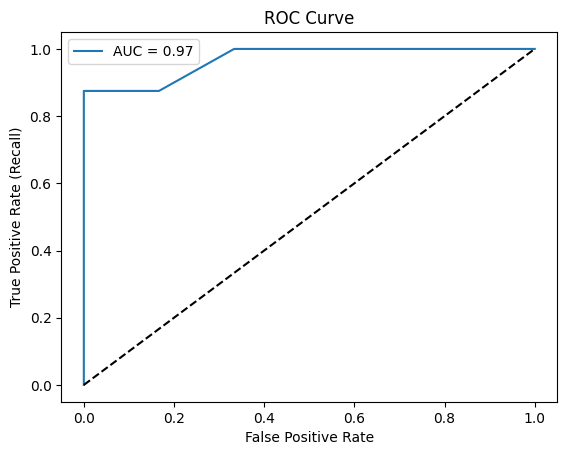

In [1]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# Example true & predicted labels
y_true = ["yes","yes","no","yes","no","yes","no","yes","yes","no","yes","no","yes","no"]
y_pred = ["yes","yes","no","no","no","yes","yes","yes","yes","no","yes","no","yes","no"]

# Confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=["yes","no"])
TP, FN, FP, TN = cm[0,0], cm[0,1], cm[1,0], cm[1,1]

print("Confusion Matrix:\n", cm)
print(f"TP={TP}, FN={FN}, FP={FP}, TN={TN}")

# Metrics
accuracy  = (TP+TN)/(TP+TN+FP+FN)
sensitivity = TP/(TP+FN)
specificity = TN/(TN+FP)
precision = TP/(TP+FP)
f1 = 2 * (precision*sensitivity)/(precision+sensitivity)

print(f"Accuracy: {accuracy:.2f}")
print(f"Sensitivity/Recall: {sensitivity:.2f}")
print(f"Specificity: {specificity:.2f}")
print(f"Precision: {precision:.2f}")
print(f"F1 Score: {f1:.2f}")

# ROC curve
y_true_bin = [1 if v=="yes" else 0 for v in y_true]
y_pred_prob = [0.9,0.8,0.3,0.4,0.2,0.95,0.7,0.85,0.9,0.1,0.8,0.4,0.88,0.3]  # example probabilities
fpr, tpr, thresholds = roc_curve(y_true_bin, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve")
plt.legend()
plt.show()
